Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?


Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [1]:
import pandas as pd

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [2]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
df.shape

(2443651, 9)

In [4]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [5]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64'), dtype('bool')]

In [6]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [7]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [8]:
df['stars'].unique()

array([4.7, 4.6, 4.5, 4.8, 0. , 4.4, 4.3, 4.1, 4.9, 5. , 3.8, 3.6, 4. ,
       4.2, 3. , 3.9, 2.5, 3.4, 3.7, 3.2, 3.3, 3.5, 2.7, 2.1, 1. , 3.1,
       2. , 2.9, 2.8, 1.5, 2.2, 2.3, 2.6, 2.4, 1.4, 1.9, 1.8, 1.7, 1.6,
       1.2, 1.3, 1.1])

In [9]:
df.select_dtypes("object").nunique().sort_values(ascending=False)


asin        2222742
title       2077591
category        296
dtype: int64

In [10]:
df_categorical = pd.concat([df.select_dtypes("object"), df.select_dtypes("bool")], axis=1)

In [11]:
df_numerical = df.select_dtypes("number")

In [16]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [12]:
df_categorical.columns

Index(['asin', 'title', 'category', 'isBestSeller'], dtype='object')

In [14]:
df_numerical.columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [18]:
len(df.columns) == len(df_numerical.columns) + len(df_categorical.columns)

True

In [19]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [20]:
# Removing the "Id" column from the dataframe
df.drop("uid", inplace=True, axis=1)

In [22]:
# Removing the "Id" column from the dataframe
df_numerical.drop("uid", inplace=True, axis=1)

# Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?


In [25]:
df['category'].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [26]:
freq_table = df['category'].value_counts()

In [32]:
# top 5 most listed product categories

freq_table_top5 = freq_table[0:5]

In [41]:
freq_table_top5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

# Visualizations:



Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

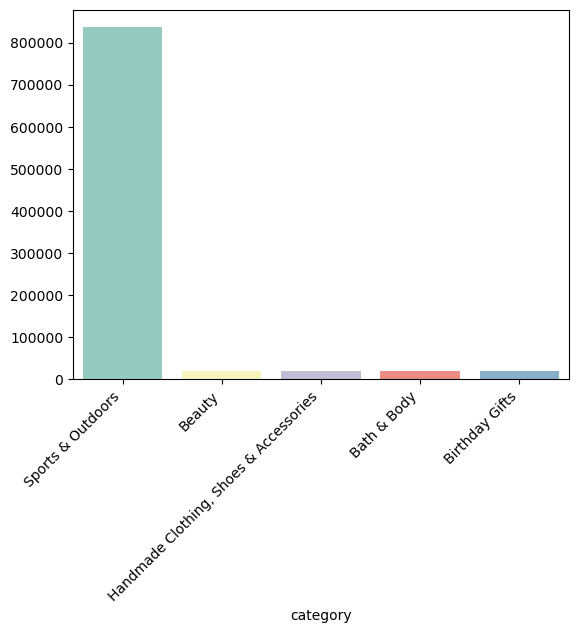

In [37]:
sns.barplot(x=freq_table_top5.index, y=freq_table_top5.values, palette="Set3");
plt.xticks(rotation=45, ha='right');

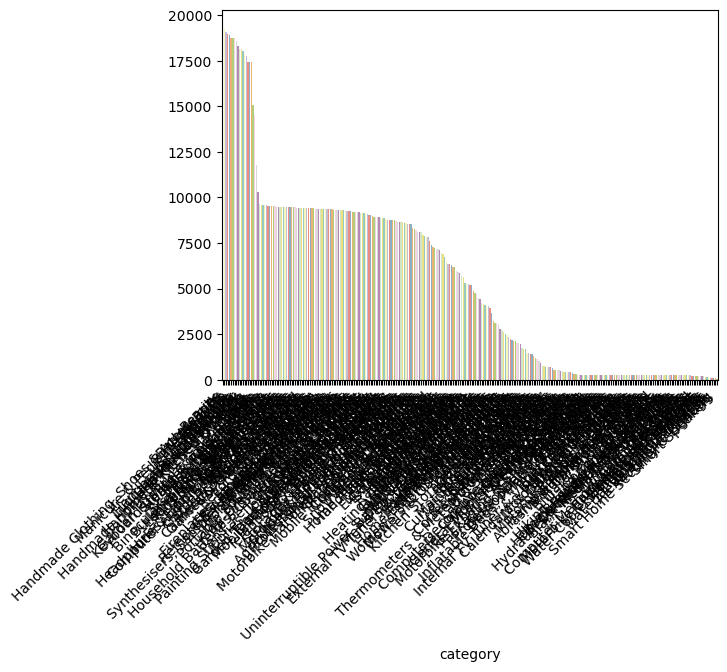

In [39]:
#Excluding my max value

freq_table_exclude_max = freq_table[freq_table.index != freq_table.idxmax()]

# Create the bar plot with the modified freq_table
sns.barplot(x=freq_table_exclude_max.index, y=freq_table_exclude_max.values, palette="Set3");

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right');

<Axes: ylabel='count'>

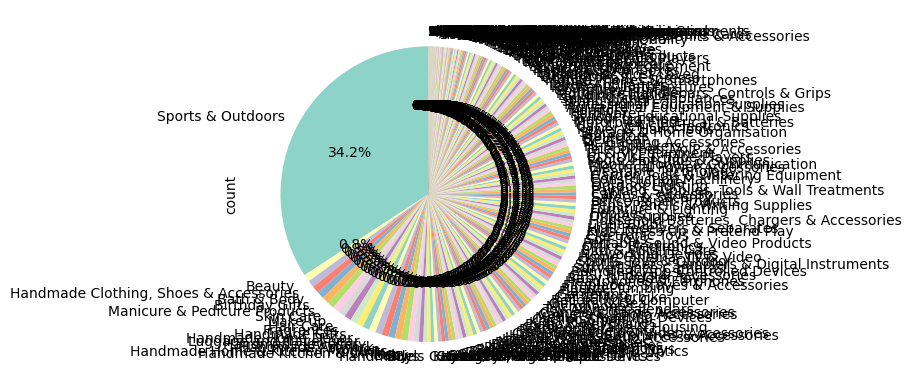

In [40]:
df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

<Axes: ylabel='count'>

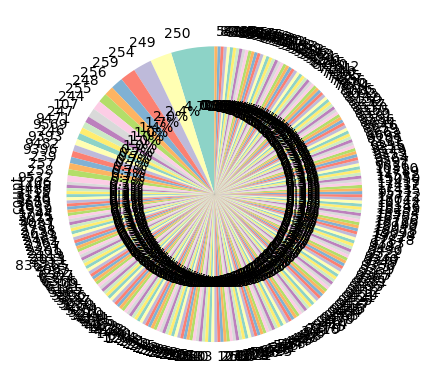

In [45]:
freq_table.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

# Part 2: Delving into Product Pricing


Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?



Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [46]:
df.columns

Index(['asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [52]:
print("price(mean): ", df['price'].mean().round(2))

price mean:  89.24


In [58]:
print("price(mode): ", df['price'].mode())

price mode:  0    9.99
Name: price, dtype: float64


In [59]:
print("price(median): ", df['price'].median())

price(median):  19.09


In [62]:
print(f"The average price point of products listed is {df['price'].mean().round(2)}.")

The average price point of products listed is 89.24.


Since the mode is 9 and the mean is 89.24, there are outliers that are impacting the mean.

# Measures of Dispersion:



Determine the variance, standard deviation, range, and interquartile range for product price.


In [63]:
print("price(variance): ", df['price'].var())

price(variance):  119445.4853225653


print("price(standard deviation):", df['price'].std())

In [76]:
df_range = df['price'].max() - (df['price'].min())

In [74]:
print(f"price(range) is: {df_range}")

price(range) is: 100000.0


In [79]:
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

In [80]:
quantiles_price

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

In [87]:
q1 = (df['price'].quantile([0.75]))
q3 = (df['price'].quantile([0.25]))

In [88]:
iqr = q1-q3

In [89]:
iqr

0.25   NaN
0.75   NaN
Name: price, dtype: float64

How varied are the product prices? Are there any indicators of a significant spread in prices?


IQR=Q3−Q1=45.99−9.99=36.00

Define 'significant'

# Visualizations

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: xlabel='price', ylabel='Count'>

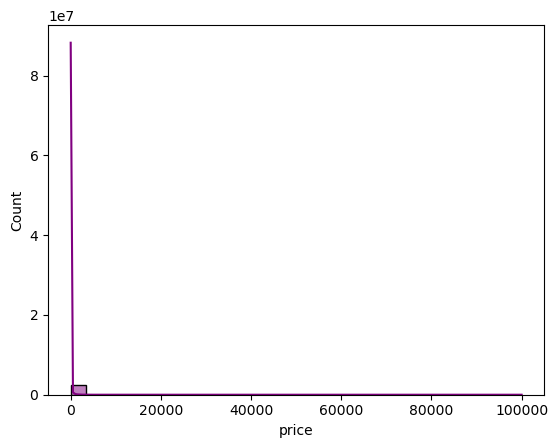

In [90]:
sns.histplot(df['price'], kde=True, bins=30, color="purple")

the ABOVE is Nou buenou

<Axes: xlabel='price', ylabel='Count'>

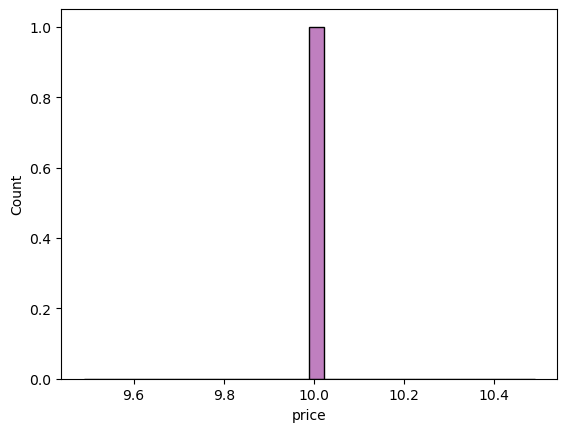

In [106]:
sns.histplot(df['price'].quantile([0.25]), kde=True, bins=30, color="purple")

<Axes: xlabel='price', ylabel='Count'>

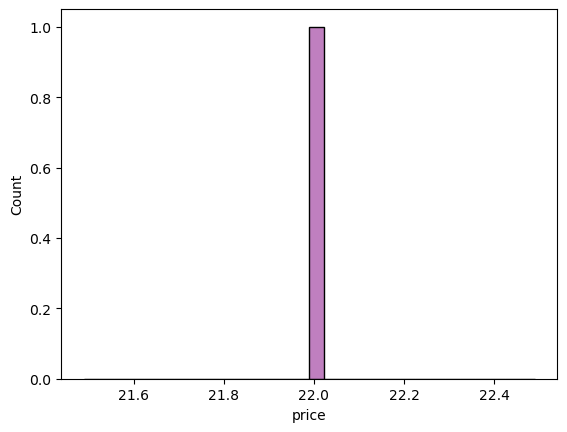

In [107]:
sns.histplot(df['price'].quantile([0.55]), kde=True, bins=30, color="purple")

<Axes: xlabel='price', ylabel='Count'>

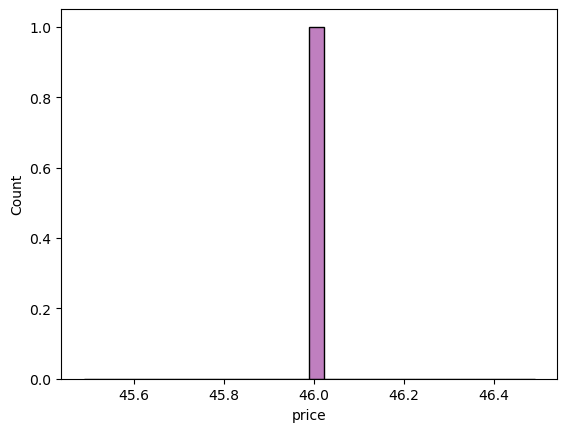

In [108]:
sns.histplot(df['price'].quantile([0.75]), kde=True, bins=30, color="purple")

In [ ]:
#how can i slice this df in quarters?

In [110]:
df.shape

(2443651, 8)

In [111]:
2443651/4

610912.75

In [112]:
610912.75 + 610912.75

1221825.5

In [113]:
1221825.5 + 610912.75

1832738.25

In [114]:
1832738.25 + 610912.75


2443651.0

In [118]:
dfpricesorted = df['price'].sort_values(ascending = True)

In [119]:
dfprice_25 = dfpricesorted[0:610912]
dfprice_50 = dfpricesorted[610912:1221825]
dfprice_75 = dfpricesorted[1221825:1832738]
dfprice_100 = dfpricesorted[1832738:2443651]


<Axes: xlabel='price', ylabel='Count'>

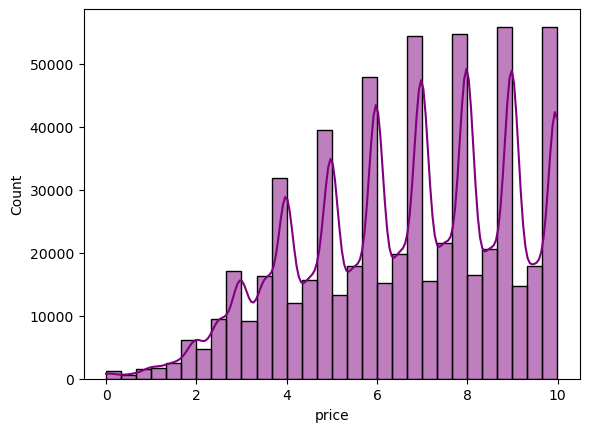

In [120]:
sns.histplot(dfprice_25, kde=True, bins=30, color="purple")

<Axes: xlabel='price', ylabel='Count'>

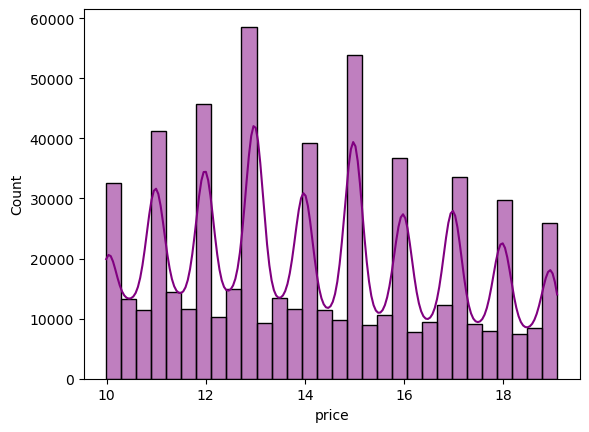

In [121]:
sns.histplot(dfprice_50, kde=True, bins=30, color="purple")

<Axes: xlabel='price', ylabel='Count'>

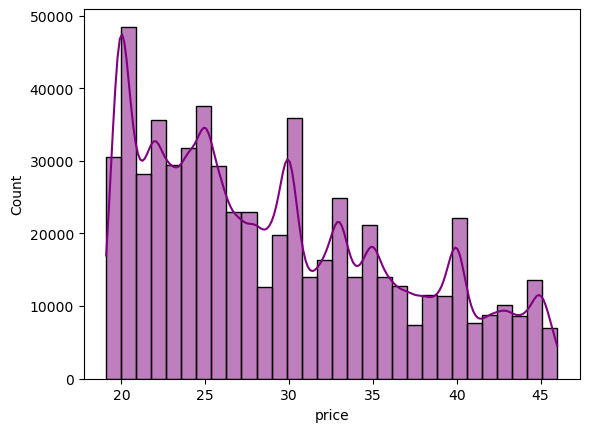

In [122]:
sns.histplot(dfprice_75, kde=True, bins=30, color="purple")

<Axes: xlabel='price', ylabel='Count'>

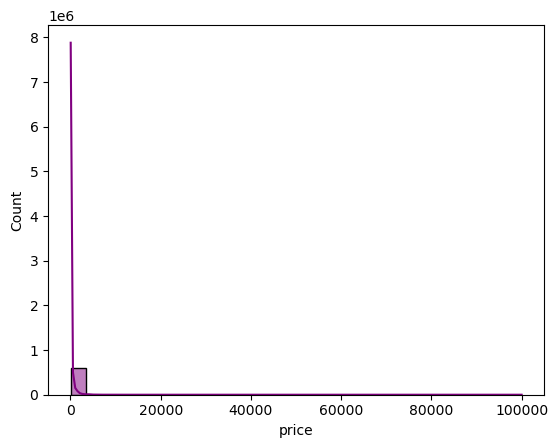

In [123]:
sns.histplot(dfprice_100, kde=True, bins=30, color="purple")

<Axes: >

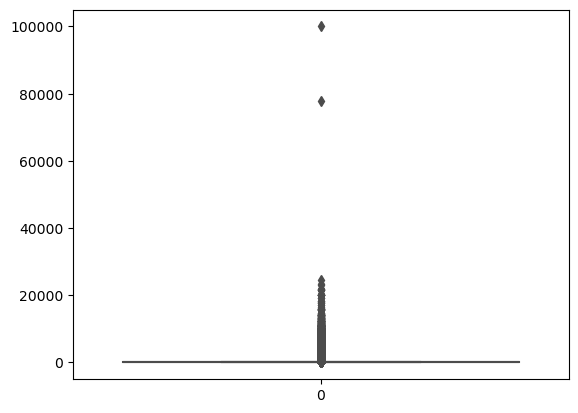

In [124]:
sns.boxplot(data = df['price'], color="yellow")

# Part 3: Unpacking Product Ratings


Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [126]:
df.columns

Index(['asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [128]:
df['stars'].mean().round(2)

2.15

In [129]:
df['stars'].median()

0.0

In [130]:
df['stars'].mode()

0    0.0
Name: stars, dtype: float64

In [133]:
df['stars'].value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

Either '0' means customers rated the product terrible or they didn't rate it. 
If they didn't rate it then there shouldn't be a rating, shouldn't be 0..., so i don't know
need to contact the engineers.

- how do you call the ones who label all the data for us data analysts to work? engineers? whats their specific role? backend?


# Measures of Dispersion:


Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [136]:
df['stars'].var()

4.81743402976196

In [137]:
df['stars'].std()

2.1948653785054697

In [ ]:
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

In [138]:
ratingq3 = df['stars'].quantile([0.75])

In [139]:
ratingq1 = df['stars'].quantile([0.25])

In [140]:
iqr_rating = ratingq3 - ratingq1

In [141]:
iqr_rating

0.25   NaN
0.75   NaN
Name: stars, dtype: float64

In [142]:
df['stars'].quantile([0.25, 0.5, 0.75])

0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64

In [ ]:
# *not consistent
#that 0 rating really fucks everything up.. doesn't make sense to analyze ratings with that crappy 0

In [144]:
df = df[df['stars'] != 0.0]


In [146]:
df['stars'].value_counts() # aha! beautiful..

stars
4.5    151577
4.6    136995
4.4    136165
5.0    128492
4.3    112564
4.7     94566
4.2     86871
4.0     66089
4.1     65115
4.8     41858
3.9     36555
3.8     27876
3.7     21137
3.6     16219
3.5     14673
3.0     12819
4.9     11081
3.4     10355
1.0      8484
3.3      8269
3.2      5771
3.1      4679
2.0      3901
2.9      3341
2.8      2306
2.7      2104
2.5      2103
2.6      1579
2.4      1060
2.3       734
2.2       602
2.1       540
1.5       404
1.9       300
1.8       249
1.7       177
1.4       149
1.6       147
1.3        78
1.2        23
1.1         3
Name: count, dtype: int64

In [151]:
print(f'the mean of rating is: {df["stars"].mean()}')
print(f'the mode of rating is: {df["stars"].mode()}')
print(f'the median of rating is: {df["stars"].median()}')
print(f'the var of rating is: {df["stars"].var()}')
print(f'the standard dev of rating is: {df["stars"].std()}')

the mean of rating is: 4.31916076222691
the mode of rating is: 0    4.5
Name: stars, dtype: float64
the median of rating is: 4.4
the var of rating is: 0.30834337523805183
the standard dev of rating is: 0.5552867504614637


In [147]:
df['stars'].quantile([0.25, 0.5, 0.75])

0.25    4.1
0.50    4.4
0.75    4.6
Name: stars, dtype: float64

In [153]:
#now it's better, pretty consistent overall - NO WIDE variation.

# Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?


In [154]:
skewness_rating = df['stars'].skew()


In [155]:
skewness_rating

-2.3795681122127945

In [156]:
kurtosis_rating = df['stars'].kurtosis()


In [157]:
kurtosis_rating

9.78193769066435

In [ ]:
negatively skewed, they plot towards hight values.

<Axes: xlabel='stars', ylabel='Count'>

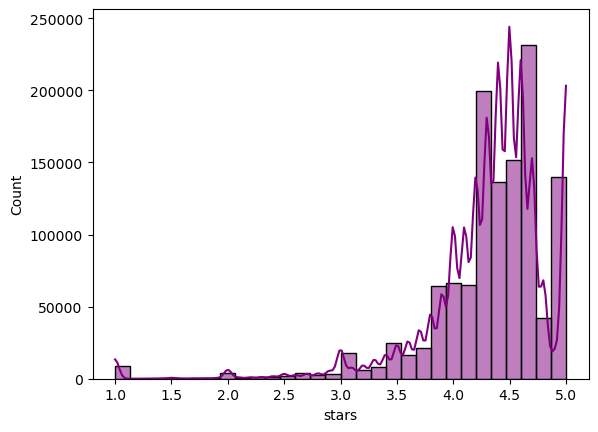

In [158]:
sns.histplot(df['stars'], kde=True, bins=30, color="purple")